In [ ]:
#ボードゲーム「ロイヤルターフ」のシミュレーションです。
#賭け金の概念もなくし、着順のみに着目しています。
#行動はランダムです。
#orderHorseの順番を入れ替えることで初期条件を設定します。

In [1]:
import random
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
orange=[[7,1,1,7],[7,3,3,3],[7,5,3,1]]
green=[[6,1,10,1],[6,6,4,2],[6,2,2,8]]
yellow=[[5,8,1,6],[5,1,1,13],[5,6,7,2]]
blue=[[4,7,3,8],[4,10,7,1],[4,1,13,4]]
red=[[3,1,5,15],[3,10,10,1],[3,9,5,7]]
black=[[2,9,8,7],[2,5,11,8],[2,14,1,9]]
white=[[1,8,9,10],[1,15,8,4],[1,3,12,12]]

In [3]:
allHorse=[[[7,1,1,7],[7,3,3,3],[7,5,3,1]],
[[6,1,10,1],[6,6,4,2],[6,2,2,8]],
[[5,8,1,6],[5,1,1,13],[5,6,7,2]],
[[4,7,3,8],[4,10,7,1],[4,1,13,4]],
[[3,1,5,15],[3,10,10,1],[3,9,5,7]],
[[2,9,8,7],[2,5,11,8],[2,14,1,9]],
[[1,8,9,10],[1,15,8,4],[1,3,12,12]]]

In [4]:
selectedHorse=[]
orderHorse=list(range(7))
# random.shuffle(orderHorse)


for i in range(7):
#     selectedHorse.append(allHorse[orderHorse[i]][random.randint(0,2)])
    selectedHorse.append(allHorse[orderHorse[i]][random.randint(0,0)])
print(selectedHorse)




[[7, 1, 1, 7], [6, 1, 10, 1], [5, 8, 1, 6], [4, 7, 3, 8], [3, 1, 5, 15], [2, 9, 8, 7], [1, 8, 9, 10]]


In [5]:
dice=[0,0,0,1,2,3]
juni=[[0,0,0,0,0] for i in range(7)]

In [6]:
#selectedHorse:各馬のステータスと初期並び順
#orderHorse:各馬の現在位置
#top3andlast:ゴールした先着３馬と最下位の馬
#waitHorse:１ターン中の馬が進む順番
for x in range(10**3):
#     orderHorse=[-i for i in range(7)]
    # orderHorse=[-6,-5,-4,-3,-2,-1,0]
    orderHorse=[-1,-5,-6,-4,0,-2,-3]
    # print(orderHorse)

    flag=0
    top3andlast=[]
    while flag!=3:


        #何色の馬が進むかの順番決め
        waitHorse=list(range(7))
        random.shuffle(waitHorse)
    #     print(waitHorse)



        #サイコロを振って何個進むか
        for i in range(7):
    #         print("#")
            dicechoice=dice[random.randint(0,5)]
            advance=selectedHorse[waitHorse[i]][dicechoice]
    #         print(dicechoice,advance)




            #進めるかどうか判定
            for j in range(advance):
    #             print(orderHorse[waitHorse[i]]+advance)
                if orderHorse[waitHorse[i]]+advance in orderHorse:
                    advance-=1
    #                 print("$")
                else:
                    orderHorse[waitHorse[i]]=orderHorse[waitHorse[i]]+advance
                    if 99>=orderHorse[waitHorse[i]]>=37:
                        top3andlast.append(waitHorse[i])
                        orderHorse[waitHorse[i]]=100
                        flag+=1
                        if flag==3:
                            for h in range(7):
                                if not(h in top3andlast) and h!=orderHorse.index(min(orderHorse)):
                                    top3andlast.append(h)
                            top3andlast.append(orderHorse.index(min(orderHorse)))
                    break
            if flag==3:
                break
    #     print(orderHorse)

    # print(orderHorse)
    # print(top3andlast)
    for i in range(7):
        if i==6:
            juni[top3andlast[i]][4]+=1
        elif i!=3 and i!=4 and i!=5:
            juni[top3andlast[i]][i]+=1
        else:
            juni[top3andlast[i]][3]+=1


In [7]:
# juni

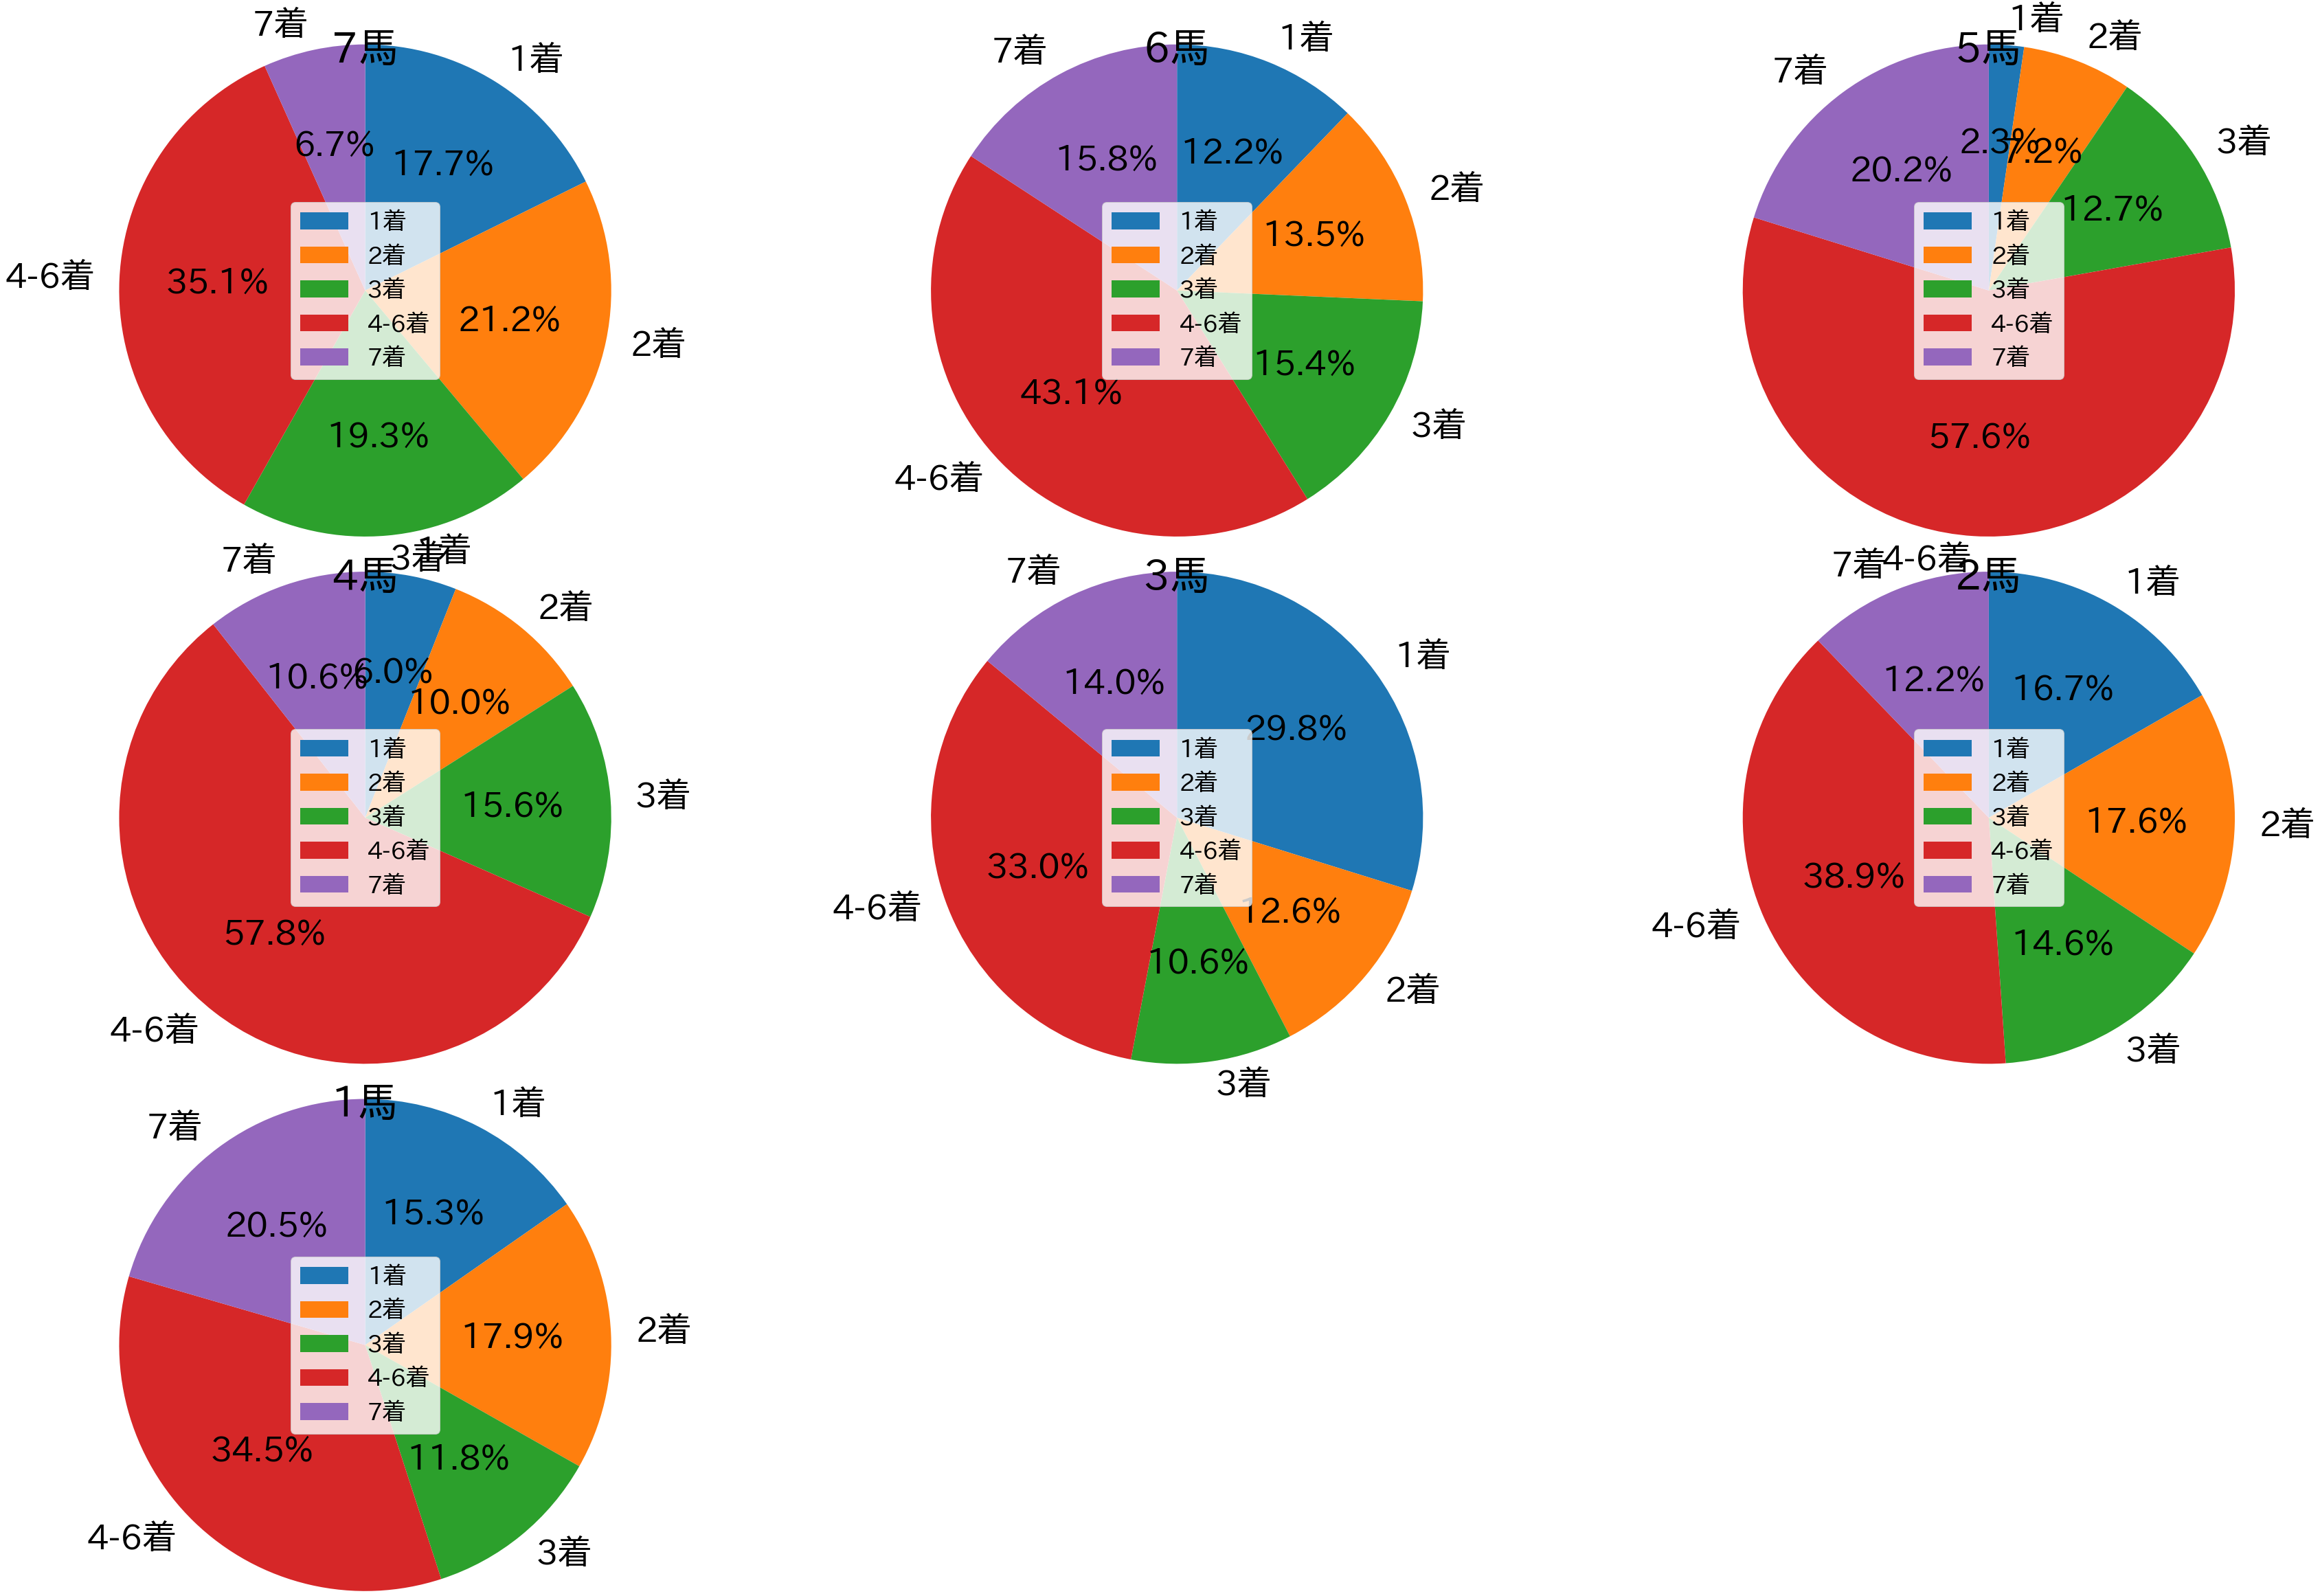

In [8]:
# for i in range(7):
#     plt.pie(juni[i],labels=juni[i],counterclock=False, startangle=90)
fig=plt.figure(figsize=(60,40))
fig.patch.set_facecolor('white')
plt.rcParams["font.size"] = 50
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    
    ax.set_title(str(7-i)+"馬",fontsize=60)
    ax.pie(juni[i],labels=["1着","2着","3着","4-6着","7着"],counterclock=False, startangle=90,autopct="%1.1f%%",radius=1.4)
    ax.legend(fontsize=35,loc="center")
    # plt.tick_params(labelsize=18)
    
plt.show()

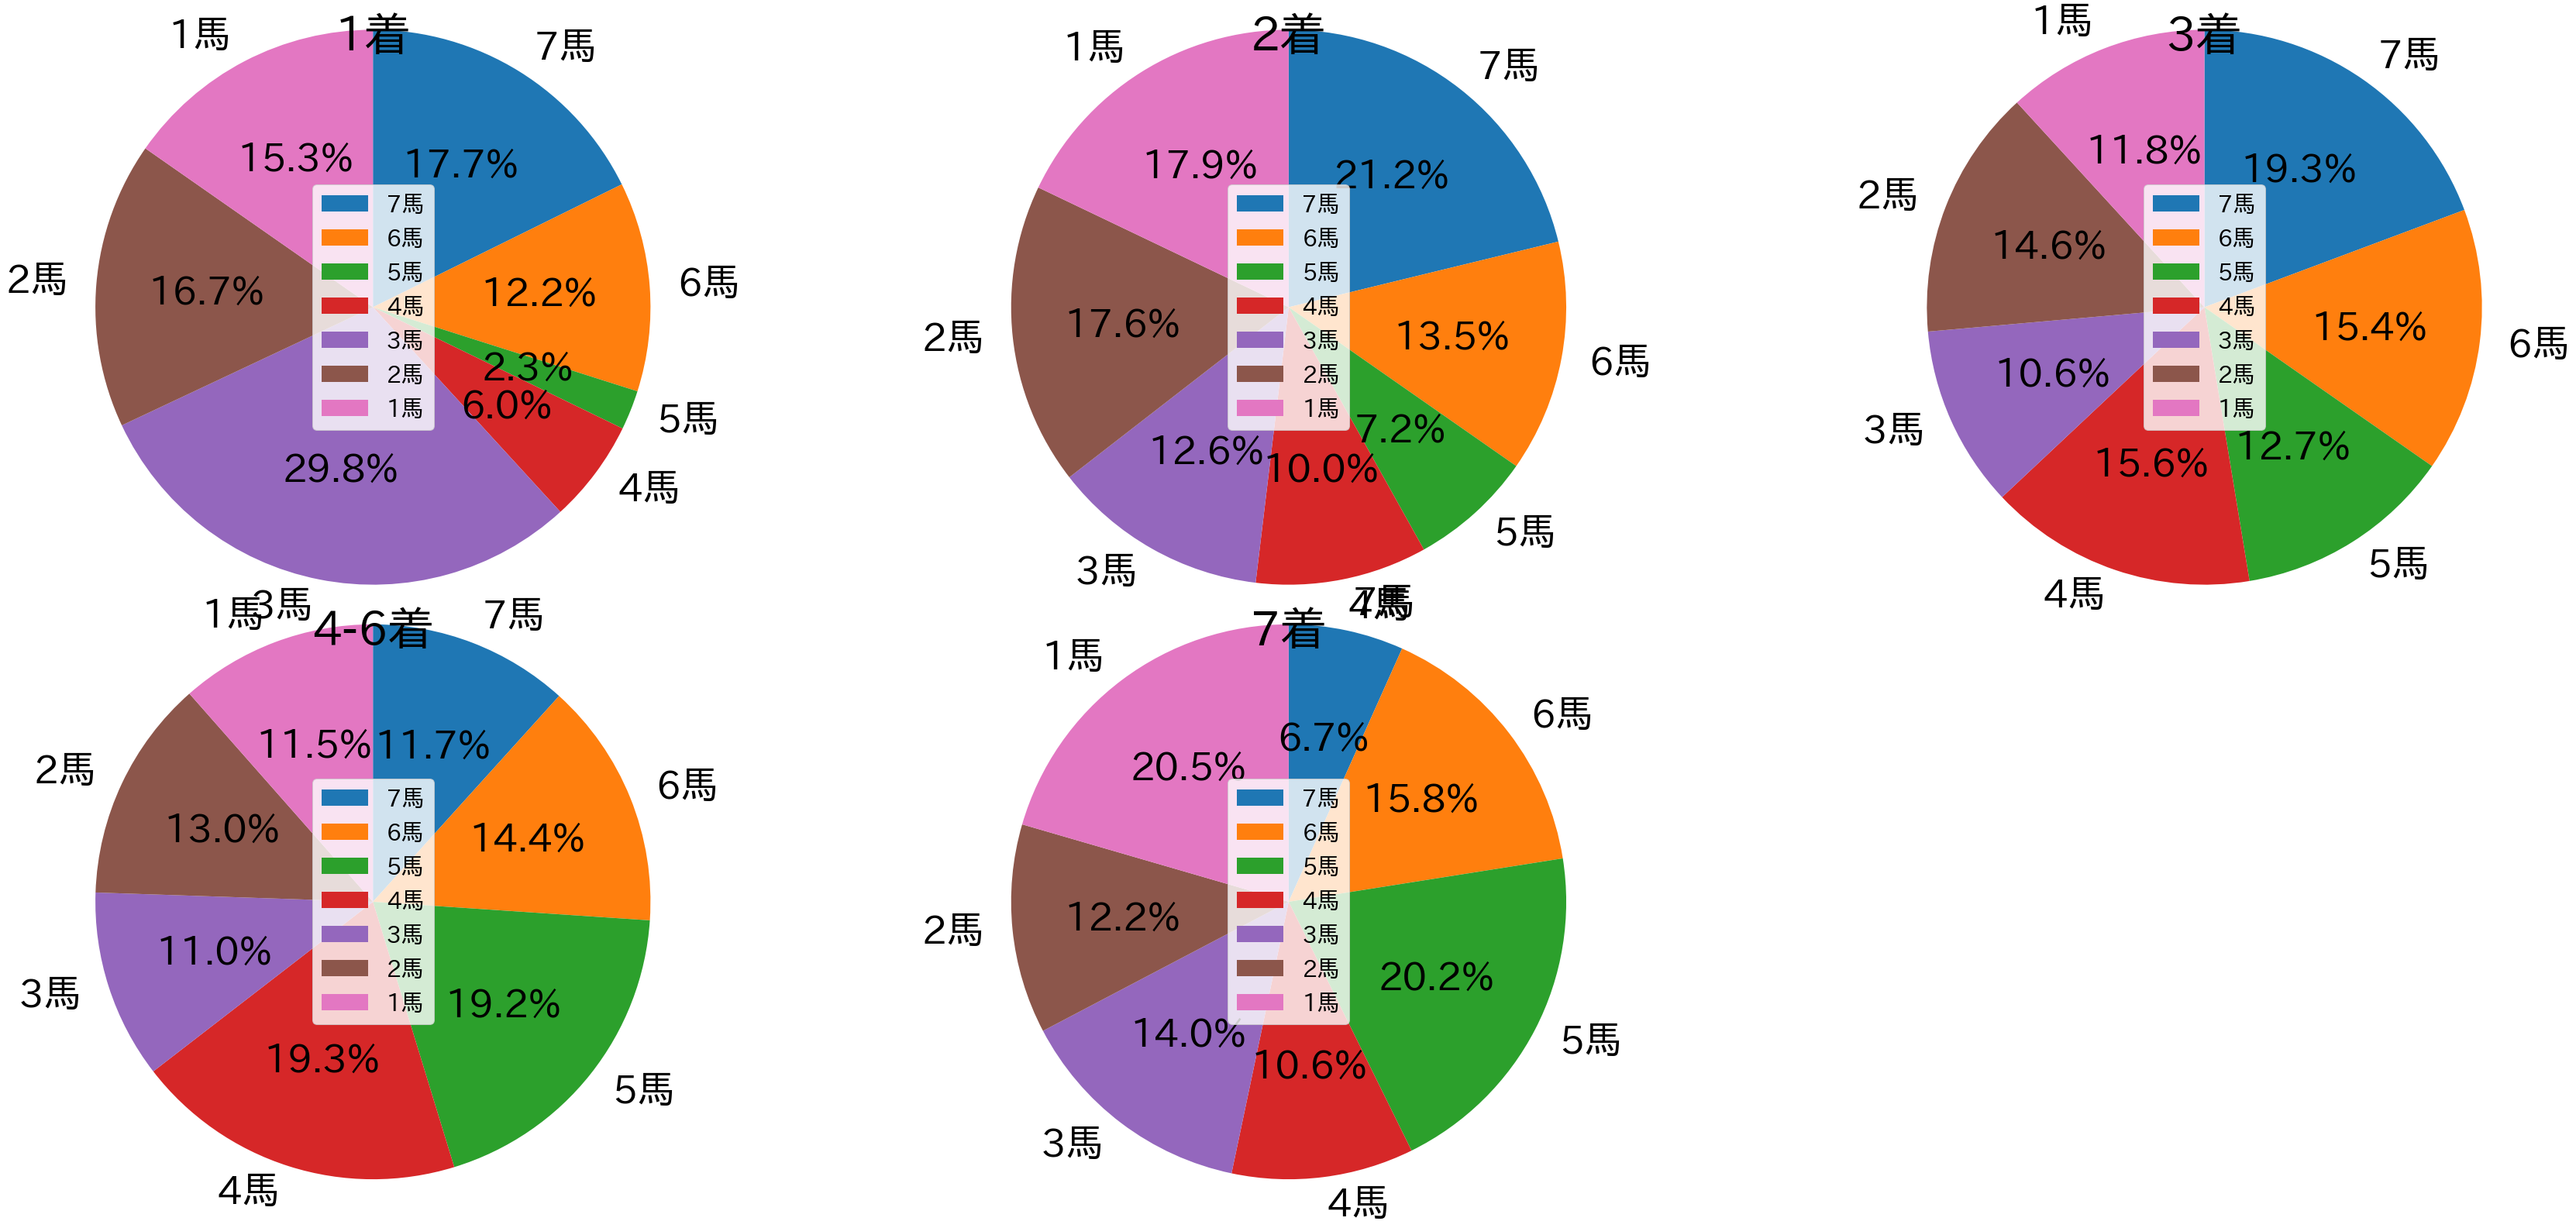

In [9]:
fig=plt.figure(figsize=(60,40))
fig.patch.set_facecolor('white')
plt.rcParams["font.size"] = 50
tyaku=["1着","2着","3着","4-6着","7着"]
for i in range(5):
    ax = fig.add_subplot(3, 3, i+1)
    
    ax.set_title(str(tyaku[i]),fontsize=60)
    ax.pie([j[i] for j in juni],labels=["7馬","6馬","5馬","4馬","3馬","2馬","1馬"],counterclock=False, startangle=90,autopct="%1.1f%%",radius=1.4)
    ax.legend(fontsize=30,loc="center")


In [10]:
print([i[0] for i in juni])

[177, 122, 23, 60, 298, 167, 153]


In [11]:
juni

[[177, 212, 193, 351, 67],
 [122, 135, 154, 431, 158],
 [23, 72, 127, 576, 202],
 [60, 100, 156, 578, 106],
 [298, 126, 106, 330, 140],
 [167, 176, 146, 389, 122],
 [153, 179, 118, 345, 205]]